# *Atelier*

# 🌟 Fusion Multimodale : Texte, Image et Audio

Bienvenue dans cet atelier consacré à la fusion multimodale, où nous explorerons l'interaction entre texte, image et audio grâce à des modèles avancés. Nous mettrons en œuvre des solutions innovantes pour transformer des descriptions textuelles en images et en sons.

Dans cet atelier, vous allez :
- Découvrir comment les modèles multimodaux révolutionnent la création et l'interprétation de contenus.
- Apprendre à utiliser **Stable Diffusion** pour générer des images captivantes à partir de descriptions textuelles (`texte → image`).
- Explorer **AudioLDM**, un modèle de pointe pour transformer des descriptions textuelles en contenu audio (`texte → audio`).
- Comprendre les bases théoriques et appliquer des exemples concrets pour maîtriser ces technologies.

Rejoignez-nous pour une aventure passionnante à la croisée des sens et de l'IA, et apprenez à donner vie à vos idées en combinant texte, image, et son ! 🎨🎵


# **Stable Diffusion** 🎨  
*...en utilisant `🧨diffusers`*  

Stable Diffusion est un modèle de diffusion latente de texte-à-image créé par les chercheurs et ingénieurs de [CompVis](https://github.com/CompVis), [Stability AI](https://stability.ai/) et [LAION](https://laion.ai/).  
Il est entraîné sur des images 512x512 provenant d'un sous-ensemble de la base de données [LAION-5B](https://laion.ai/blog/laion-5b/).  
Ce modèle utilise un encodeur de texte CLIP ViT-L/14 gelé pour conditionner le modèle sur des invites textuelles. Avec ses **860M de paramètres pour le UNet** et **123M pour l'encodeur de texte**, le modèle est relativement léger et peut fonctionner sur de nombreux GPU destinés aux consommateurs.  

Consultez la [fiche du modèle](https://huggingface.co/CompVis/stable-diffusion) pour plus d'informations.  

---

## Commençons ! 🚀


## **Configuration du GPU** ⚙️  

Assurons-nous d'être connectés à un GPU pour exécuter ce notebook.  
Pour obtenir un GPU :  
1. Cliquez sur `Exécution` -> `Modifier le type d'exécution`.  
2. Changez l'option `Accélérateur matériel` de `Aucun` à `GPU`.  

Nous pouvons vérifier que nous avons bien un GPU assigné et consulter ses spécifications en utilisant la commande suivante :  

```bash
!nvidia-smi


In [1]:
!nvidia-smi

Thu Jan  2 18:37:38 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--


Ensuite, vous devez installer les bibliothèques suivantes :  
- `diffusers`  
- `scipy`  
- `ftfy`  
- `transformers`  

La bibliothèque `accelerate` est également recommandée pour un chargement beaucoup plus rapide.  


In [2]:
from IPython.display import clear_output
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate
clear_output()


In [3]:
!pip install --upgrade diffusers huggingface_hub
clear_output()


### **Pipeline Stable Diffusion** 🎨  

La classe `StableDiffusionPipeline` est une pipeline d'inférence de bout en bout que vous pouvez utiliser pour générer des images à partir de texte en seulement quelques lignes de code.  

Tout d'abord, nous chargeons les poids pré-entraînés de tous les composants du modèle.  
Dans ce notebook, nous utilisons la version 1.4 de Stable Diffusion ([CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4)), mais d'autres variantes sont également disponibles :  
- [runwayml/stable-diffusion-v1-5](https://huggingface.co/runwayml/stable-diffusion-v1-5)  
- [stabilityai/stable-diffusion-2-1-base](https://huggingface.co/stabilityai/stable-diffusion-2-1-base)  
- [stabilityai/stable-diffusion-2-1](https://huggingface.co/stabilityai/stable-diffusion-2-1) : Cette version peut produire des images avec une résolution de **768x768**, tandis que les autres fonctionnent en **512x512**.  

En plus de l'identifiant du modèle [CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4), nous passons également une `revision` spécifique et le paramètre `torch_dtype` à la méthode `from_pretrained`.  

Pour garantir que Stable Diffusion puisse fonctionner sur les versions gratuites de Google Colab, nous chargeons les poids à partir de la branche de demi-précision [`fp16`](https://huggingface.co/CompVis/stable-diffusion-v1-4/tree/fp16) et nous informons `diffusers` d'attendre les poids en précision float16 en utilisant l'argument `torch_dtype=torch.float16`.  

Si vous souhaitez utiliser la précision la plus élevée possible, vous pouvez retirer l'argument `torch_dtype=torch.float16`, mais cela augmentera considérablement l'utilisation de la mémoire.  


In [4]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
clear_output()


Ensuite, déplaçons la pipeline vers le GPU pour accélérer l'inférence.  


In [5]:
pipe = pipe.to("cuda")

Et nous sommes prêts à générer des images et à les enregistrer :  


  0%|          | 0/50 [00:00<?, ?it/s]

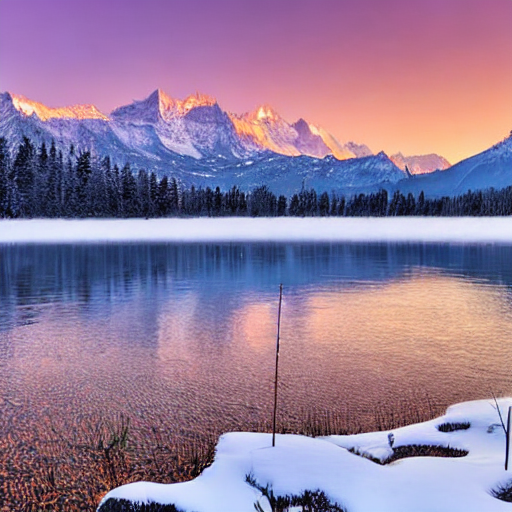

In [6]:
prompt = "A serene lake surrounded by snow-capped mountains at sunrise."
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
image.save(f"lake_image.png")

# or if you're in a google colab you can directly display it with
image

## Les styles d'AudioLDM 🎺  


AudioLDM a été proposé dans l'article [AudioLDM : Génération de texte-à-audio avec des modèles de diffusion latente](https://audioldm.github.io) par Haohe Liu et al. Inspiré par Stable Diffusion, AudioLDM est un modèle de diffusion latente (LDM) de texte-à-audio qui apprend des représentations audio continues à partir des latents CLAP. AudioLDM prend une invite textuelle en entrée et prédit l'audio correspondant. Il peut générer des effets sonores conditionnés par du texte, des discours humains et de la musique.  


Le modèle AudioLDM est composé de quatre étapes :  
1. Encodeur de texte CLAP qui mappe une entrée textuelle à un vecteur d'encodage texte (CLAP est entraîné de manière à ce que cet encodage texte soit partagé avec l'échantillon audio correspondant).  
2. Modèle de diffusion latente (LDM) qui effectue la routine de débruitage pour récupérer le latent audio.  
3. Décodeur VAE pour mapper les latents LDM à une représentation de spectrogramme log-mel.  
4. Modèle Vocoder pour générer l'onde sonore à partir du spectrogramme généré.  

Ces quatre étapes sont illustrées ci-dessous, tirées de la figure 1 de l'[article AudioLDM](https://arxiv.org/abs/2301.12503) :

<p align="center">
  <img src="https://github.com/sanchit-gandhi/notebooks/blob/main/audioldm.jpg?raw=true" width="600"/>
</p>

Le [`AudioLDMPipeline`](https://huggingface.co/docs/diffusers/main/en/api/pipelines/audioldm) est une pipeline d'inférence de bout en bout qui regroupe ces quatre étapes dans une seule classe, permettant de générer des échantillons audio à partir de texte en quelques lignes de code.  

Il existe quatre points de contrôle AudioLDM disponibles qui varient en taille de modèle et en schéma d'entraînement (c'est-à-dire le nombre d'étapes et la condition audio), résumés dans le tableau ci-dessous :  

| Point de contrôle                                                        | Étapes d'entraînement | Condition audio | Dimension audio CLAP | Dimension UNet | Paramètres |  
|--------------------------------------------------------------------------|-----------------------|-----------------|----------------------|-----------------|------------|  
| [audioldm-s-full](https://huggingface.co/cvssp/audioldm)                   | 1,5M                  | Non             | 768                  | 128             | 421M       |  
| [audioldm-s-full-v2](https://huggingface.co/cvssp/audioldm-s-full-v2)      | > 1,5M                | Non             | 768                  | 128             | 421M       |  
| [audioldm-m-full](https://huggingface.co/cvssp/audioldm-m-full)            | 1,5M                  | Oui             | 1024                 | 192             | 652M       |  
| [audioldm-l-full](https://huggingface.co/cvssp/audioldm-l-full)            | 1,5M                  | Non             | 768                  | 256             | 975M       |  

Nous allons initialiser la pipeline avec les poids pré-entraînés de la version v2 du point de contrôle le plus petit ([audioldm-s-full-v2](https://huggingface.co/cvssp/audioldm-s-full-v2)). Nous allons également charger les poids en demi-précision (float16) pour accélérer le temps d'inférence.  


In [8]:
from diffusers import AudioLDMPipeline
import torch

model_id = "cvssp/audioldm-s-v2"
pipe = AudioLDMPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
clear_output()


Déplaçons la pipeline vers le GPU pour accélérer l'inférence.  

In [9]:
pipe.to("cuda");

Nous allons définir un [Generator](https://pytorch.org/docs/stable/generated/torch.Generator.html) et définir une [Seed](https://huggingface.co/docs/diffusers/using-diffusers/reproducibility) pour garantir la reproductibilité. Cela nous permettra d'ajuster nos invites et d'observer l'effet qu'elles ont sur les générations en fixant les latents de départ dans le modèle LDM.  


In [10]:
generator = torch.Generator("cuda").manual_seed(0)

🎶 **Génération d'un audio de Lac Sérénité** 🎧  

Dans cette section, nous allons générer un clip audio apaisant d'un lac tranquille entouré de montagnes enneigées au lever du soleil. 🌄💧  
Grâce à la puissance de l'apprentissage profond, nous allons créer l'audio à partir d'une invite textuelle, puis enregistrer et jouer le son généré pour une expérience vraiment immersive. 🎵✨  

En utilisant une invite personnalisée qui décrit la scène paisible et une invite négative pour éviter les sons de mauvaise qualité, nous allons générer un audio de haute qualité et l'enregistrer au format WAV. Une fois terminé, vous pourrez écouter ces sons apaisants juste ici ! 🔊🎶  

Plongeons dans cette expérience et profitons du son serein de la nature ! 🌅  


In [11]:
from IPython.display import Audio
import torch
import soundfile as sf  # To save audio in WAV format

# Define the prompt and negative prompt
prompt = "A serene lake surrounded by snow-capped mountains at sunrise."
negative_prompt = "Low quality, average quality"

# Set up the generator and inference parameters
generator = torch.Generator("cuda").manual_seed(0)

# Generate the audio
audio = pipe(prompt, negative_prompt=negative_prompt, num_inference_steps=10, audio_length_in_s=5, generator=generator).audios[0]

# Save the generated audio to a WAV file
sf.write("lake_audio.wav", audio, 16000)  # Save at 16000 Hz

# Play the audio in the notebook
Audio("lake_audio.wav", rate=16000, autoplay=True)


  0%|          | 0/10 [00:00<?, ?it/s]

# Installation de Gradio

Dans cette cellule, nous allons installer **Gradio**, une bibliothèque permettant de créer facilement des interfaces interactives pour vos modèles d'IA.


In [12]:
!pip install gradio
clear_output()


# Génération d'Image et d'Audio à partir de Texte

Dans cette cellule, nous allons créer une fonction qui génère à la fois une **image** et un **fichier audio** à partir d'un prompt texte. Le processus comprend les étapes suivantes :
- Génération d'une image à partir du texte en utilisant un modèle d'IA.
- Génération d'un fichier audio à partir du même texte.
- Sauvegarde du fichier audio généré au format WAV.

Nous utiliserons la bibliothèque **Gradio** pour créer une interface interactive permettant à l'utilisateur de fournir un prompt texte et de recevoir l'image et l'audio générés. Après avoir lancé l'interface, vous pourrez tester la génération multimodale en temps réel.


In [14]:
import gradio as gr
import soundfile as sf
image_pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
image_pipe = image_pipe.to("cuda")
audio_pipe = AudioLDMPipeline.from_pretrained("cvssp/audioldm-s-v2", torch_dtype=torch.float16)
audio_pipe.to("cuda");
def generate_image_and_audio(prompt):
    try:
        # Generate Image
        print("Generating image...")
        image = image_pipe(prompt).images[0]
        print("Image generated successfully.")

        # Generate Audio
        print("Generating audio...")
        audio = audio_pipe(prompt, num_inference_steps=10, audio_length_in_s=5).audios[0]
        print("Audio generated successfully.")

        # Save Audio
        audio_path = "generated_audio.wav"
        sf.write(audio_path, audio, samplerate=16000)
        print("Audio saved successfully.")

        return image, audio_path
    except Exception as e:
        print("An error occurred:", e)
        return None, None

# Gradio Interface
interface = gr.Interface(
    fn=generate_image_and_audio,
    inputs="text",
    outputs=["image", "audio"]
)

# Launch with debugging enabled
interface.launch(debug=True)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://c4c4763d97571896e7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Generating image...


  0%|          | 0/50 [00:00<?, ?it/s]

Image generated successfully.
Generating audio...


  0%|          | 0/10 [00:00<?, ?it/s]

Audio generated successfully.
Audio saved successfully.
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://c4c4763d97571896e7.gradio.live
